# TensorFlow Tutorial #02

## Introduction

The previous tutorial showed that a simple linear model had about 88.48% classification accuracy for recognizing fashion images in the fashion data set. 

In this tutorial we will implement a simple Convolutional Neural Network in TensorFlow which has a classification accuracy of X, or more if you make some of the suggested exercises. 

Convolutional Networks work by moving small filters across the input image. This means the filters are re-used for recognizing patterns throughout the entire input image. This makes the Convolutional Networks much more powerful than Fully-Connected networks with the same number of variables. This in turn makes the Convolutional Networks faster to train. 

CNN is a deep, feed-forward neural network or also called MLP (multi-layer perceptrons). These are feed forward models because information flows right through the network. 

CNNs specifically are inspired by the biological visual cortex. The cortex has small regions of cells that are sensitive to the specific areas of the visual field. This idea was expanded by a captivating experiment done by Hubel and Wiesel in 1962 (if you want to know more, here's a video: https://www.youtube.com/watch?v=Cw5PKV9Rj3o). In this experiment, the researchers showed that some individual neurons in the brain activated or fired only in the presence of edges of a particular orientation like vertical or horizontal edges. For example, some neurons fired when exposed to vertical sides and some when shown a horizontal edge. Hubel and Wiesel found that all of these neurons were well ordered in a columnar fashion and that together they were able to produce visual perception. This idea of specialized components inside of a system having specific tasks is one that machines use as well and one that you can also find back in CNNs.

Below image is about the CNN network and how the image moves as an input to the output, going through various phases like subsampling, convolutions. 

![Figure: Convolutional Neural Network from Wikimedia](images/wikimedia_cnn_image.png)

### A bit about CNN concepts:

1. What does a CNN do?

Well, a convolution layer computes the output of neurons that are connected to local regions or receptive fields in the input, each computing a dot product between their weights and a small receptive field to which they are connected to in the input volume. 

Each computation leads to extraction of a feature map from the input image. 

Imagine that you have an image represented as a 5x5 matrix of values, and you take a 3x3 matrix and slide tht 3x3 window or kernel around the image. At each position of that matrix, you multiply the values of your 3x3 window by the values in the image that are currently being covered by the window. As a result, you'll get a single number that represents all the values in that window of the images. You use this layer to filtering: as the window moves over the image, you check for patterns in that section of the image. This works because of filters, which are multiplied by the values outputted by the convolution.

2. Well, that's all and good. What about subsampling?

The objective of subsampling is to get an input representation by reducing its dimensions, which helps in reducing overfitting. One of the techniques of subsampling is max pooling. With this technique, you select the highest pixel value from a region depending on its size. In other words, max pooling takes the largest value from the window of the image currently covered by the kernel. 

### Fashion-MNIST Data set

Again, we would be using the Fashion MNIST data set from the previous tensorflow tutorial. 

The Fashion-MNIST dataset contains Zalando's article images, with 28x28 grayscale images of 65,000 fashion products from 10 categories, and 6,500 images per category. The training set has 55,000 images, and the test set has 10,000 images. 

#### Loading the data

In [15]:
from keras.datasets import fashion_mnist

(df_train_X, df_train_Y), (df_test_X, df_test_Y) = fashion_mnist.load_data()

#### Lets Analyze the data set:

In [16]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape: ', df_train_X.shape, df_train_Y.shape)
print('Testing data shape: ', df_test_X.shape, df_test_Y.shape)

Training data shape:  (60000, 28, 28) (60000,)
Testing data shape:  (10000, 28, 28) (10000,)


From the above output, you can see that the training data has a shape of 60000 * 28 * 28 since there are 60,000 training samples each of 28 * 28 dimensions. 

In [17]:
# Find unique numbers from training labels:

classes = np.unique(df_train_Y)
nClasses = len(classes)

print('Total number of ouputs: ', nClasses)
print('Output classes: ', classes)

Total number of ouputs:  10
Output classes:  [0 1 2 3 4 5 6 7 8 9]


There's also a total of ten output classes that range from 0 to 9.

Text(0.5, 1.0, 'Ground Truth : 7')

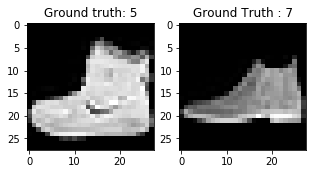

In [18]:
# Lets plot some images

plt.figure(figsize=[5,5])

plt.subplot(121)
plt.imshow(df_train_X[0, :, :], cmap='gray')
plt.title("Ground truth: {}".format(df_train_Y[12]))

plt.subplot(122)
plt.imshow(df_test_X[0, :, :], cmap='gray')
plt.title("Ground Truth : {}".format(df_test_Y[12]))


The output of above two plots looks like an ankle boot, and this class is assigned a class label of 9. Similarly, other fashion products will have different labels, but similar products will have same labels. This means that all the 7,000 ankle boot images will have a class label of 9.

#### Data Preprocessing

As you can see, the images are grayscale images that have pixel values that range from 0 to 255. Also, these images have a dimension of 28 * 28. As a result, you'll need to preprocess the data before you feed it into the model. 


In [19]:
df_train_X = df_train_X.reshape(-1, 28, 28, 1)
df_test_X  = df_test_X.reshape(-1, 28, 28, 1)

df_train_X.shape, df_test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

The data right now is in an int8 format, so before you feed it into the network you need to convert its type to float32, and you also have to rescale the pixel values in range 0 - 1 inclusive.

In [20]:
df_train_X = df_train_X.astype('float32')
df_test_X  = df_test_X.astype('float32')

df_train_X = df_train_X / 255
df_test_X  = df_test_X / 255

Next step is to convert class labels into integer values via one-hot encoding. It's a process of converting categorical data into numeric or vecot of numbers. 

For your problem statement, the one hot encoding will be a row vector, and for each image, it will have a dimension of 1 x 10. 

The important thing to note here is that the vector consists of all zeros except for the class that it represents, and for that, it is 1. 

For example, the ankle boot image that you plotted above has a label of 9, so for all the ankle boot images, the one hot encoding vector would be [0 0 0 0 0 0 0 0 1 0].

In [21]:
# change the labels from categorical to one-hot encoding:
df_train_Y_one_hot = to_categorical(df_train_Y)
df_test_Y_one_hot  = to_categorical(df_test_Y)

# display the change for category label
print('Original label: ', df_train_Y[8])
print('After conversion to one-hot: ', df_train_Y_one_hot[8])

Original label:  5
After conversion to one-hot:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


This last step is a crucial one. In machine learning or any data specific task, you should partition the data correctly. For the model to generalize well, you split the training data into two parts, one designed for training and another one for validation. In this case, you will train the model on 80\% of the training data and validate it on 20\% of the remaining training data. This will also help to reduce overfitting since you will be validating the model on the data it would not have seen in training phase, which will help in boosting the test performance.

In [22]:
from sklearn.model_selection import train_test_split

df_train_X, df_valid_X, df_train_label, df_valid_label = train_test_split(df_train_X, 
                                                                          df_train_Y_one_hot, 
                                                                          test_size=0.2, 
                                                                          random_state=13)

In [23]:
df_train_X.shape, df_valid_X.shape, df_train_label.shape, df_valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

#### Network Architecture

You'll use three convolutional layers:

- The first layer will have 32-3 x 3 filters,
- The second layer will have 64-3 x 3 filters and
- The third layer will have 128-3 x 3 filters.

In addition, there are three max-pooling layers each of size 2 x 2.

![Figure: Convolutional Neural Network Architecture](images/architecture_cnn_01.png)

#### Model the data

In [24]:
import keras 
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [26]:
batch_size = 128
epochs = 50
num_classes = 10

Let's take more about the architecture:

1. First layer: Conv2D: 

    We are using this function because we are working with images.
    
    
2. Second Layer: Leaky ReLU:

    We are using leaky relu because we need a non-linear decision boundary that could separate our 10 classes which are not linearly separable. 

    More specifically, you add Leaky ReLUs because they attempt to fix the problem of dying Rectified Linear Units (ReLUs). The ReLU activation function is used a lot in neural network architectures and more specifically in convolutional networks, where it has proven to be more effective than the widely used logistic sigmoid function. 

    As of 2017, this activation function is the most popular one for deep neural networks. The ReLU function allows the activation to be thresholded at zero. However, during the training, ReLU units can "die". This can happen when a large gradient flows through a ReLU neuron: it can cause the weights to update in such a way that the neuron will never activate on any data point again. If this happens, then the gradient flowing through the unit will forever be zero from that point on. Leaky ReLUs attempt to solve this: the function will not be zero but will instead have a small negative slope.

3. Third Layer: MaxPooling2D()

4. The last layer is a Dense layer that has a softmax activation function with 10 units, which is needed for this multi-class classification problem.


In [27]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, 
                     kernel_size=(3,3), 
                     activation='linear', 
                     input_shape=(28,28,1),
                     padding='same'))

cnn_model.add(LeakyReLU(alpha=0.1))

cnn_model.add(MaxPooling2D((2,2),padding='same'))

cnn_model.add(Conv2D(64, (3,3), activation='linear',padding='same'))

cnn_model.add(LeakyReLU(alpha=0.1))
              
cnn_model.add(MaxPooling2D(pool_size=(2,2),padding='same'))

cnn_model.add(Conv2D(128, (3,3), activation='linear',padding='same'))

cnn_model.add(LeakyReLU(alpha=0.1))

cnn_model.add(MaxPooling2D(pool_size=(2,2),padding='same'))

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation='linear'))

cnn_model.add(LeakyReLU(alpha=0.1))

cnn_model.add(Dense(num_classes, activation='softmax'))


#### Compile the model

Optimizer used: Adam optimizer
Loss type: Categorical Cross Entropy
Metrics: Accuracy

In [29]:
cnn_model.compile(loss=keras.losses.categorical_crossentropy, 
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])

In [30]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
__________

#### Training the model

In [31]:
cnn_train = cnn_model.fit(df_train_X,
                         df_train_label,
                         batch_size=batch_size,
                         epochs=epochs,
                         verbose=1,
                         validation_data=(df_valid_X, df_valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 5s 110us/step - loss: 0.5275 - acc: 0.8080 - val_loss: 0.3852 - val_acc: 0.8608
Epoch 2/50
48000/48000 [==============================] - 3s 57us/step - loss: 0.3222 - acc: 0.8848 - val_loss: 0.3140 - val_acc: 0.8862
Epoch 3/50
48000/48000 [==============================] - 3s 60us/step - loss: 0.2727 - acc: 0.9004 - val_loss: 0.2624 - val_acc: 0.9048
Epoch 4/50
48000/48000 [==============================] - 3s 61us/step - loss: 0.2361 - acc: 0.9142 - val_loss: 0.2522 - val_acc: 0.9094
Epoch 5/50
48000/48000 [==============================] - 3s 62us/step - loss: 0.2157 - acc: 0.9210 - val_loss: 0.2400 - val_acc: 0.9135
Epoch 6/50
48000/48000 [==============================] - 3s 58us/step - loss: 0.1944 - acc: 0.9291 - val_loss: 0.2408 - val_acc: 0.9136
Epoch 7/50
48000/48000 [==============================] - 3s 59us/step - loss: 0.1748 - acc: 0.9366 - val_loss: 0.2231 - val_ac

Finally! You trained the model on fashion-MNIST for 50 epochs, and by observing the training accuracy and loss, you can say that the model did a good job since after 50 epochs the training accuracy is 99.73% and the training loss is quite low.

However, it looks like the model is overfitting, as the validation loss is 0.5788 and the validation accuracy is 91.88%. 

Overfitting gives an intuition that the network has memorized the training data very well but is not guaranteed to work on unseen data, and that is why there is a difference in the training and validation accuracy.

You probably need to handle this. In next sections, you'll learn how you can make your model perform much better by adding a Dropout layer into the network and keeping all the other layers unchanged.

#### Model Evaluation:

Lets evaluate our model over test data to see how it performs.

In [32]:
test_eval = cnn_model.evaluate(df_test_X, df_test_Y_one_hot, verbose=0)

In [33]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.5835507197014754
Test accuracy: 0.9213


The test accuracy looks impressive. It turns out that your classifier does better than the benchmark that was reported, which is an SVM classifier with mean accuracy of 0.897. Also, the model does well compared to some of the deep learning models mentioned on the GitHub profile of the creators of fashion-MNIST dataset.

Let's put our model evaluation into plots of accuracy vs loss between training and validation data:

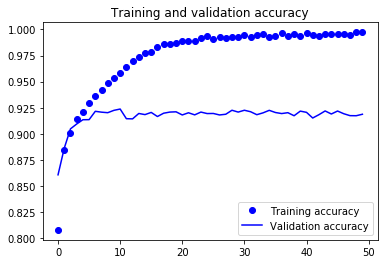

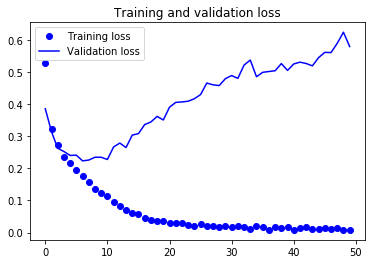

In [34]:
accuracy = cnn_train.history['acc']
val_accuracy = cnn_train.history['val_acc']
loss = cnn_train.history['loss']
val_loss = cnn_train.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

From the above two plots, you can see that the validation accuracy almost became stagnant after 4-5 epochs and rarely increased at certain epochs. In the beginning, the validation accuracy was linearly increasing with loss, but then it did not increase much.

The validation loss shows that this is the sign of overfitting, similar to validation accuracy it linearly decreased but after 4-5 epochs, it started to increase. This means that the model tried to memorize the data and succeeded.

With this in mind, it's time to introduce some dropout into our model and see if it helps in reducing overfitting.

#### Adding Dropout into the Network

You can add a dropout layer to overcome the problem of overfitting to some extent. Dropout randomly turns off a fraction of neurons during the training process, reducing the dependency on the training set by some amount. How many fractions of neurons you want to turn off is decided by a hyperparameter, which can be tuned accordingly. This way, turning off some neurons will not allow the network to memorize the training data since not all the neurons will be active at the same time and the inactive neurons will not be able to learn anything.

So let's create, compile and train the network again but this time with dropout. And run it for 20 epochs with a batch size of 64.

In [44]:
batch_size = 64
epochs = 50
num_classes = 10

In [45]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, 
                     kernel_size=(3,3), 
                     activation='linear', 
                     input_shape=(28,28,1),
                     padding='same'))

cnn_model.add(LeakyReLU(alpha=0.1))

cnn_model.add(MaxPooling2D((2,2),padding='same'))

cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3,3), activation='linear',padding='same'))

cnn_model.add(LeakyReLU(alpha=0.1))
              
cnn_model.add(MaxPooling2D(pool_size=(2,2),padding='same'))

cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3,3), activation='linear',padding='same'))

cnn_model.add(LeakyReLU(alpha=0.1))

cnn_model.add(MaxPooling2D(pool_size=(2,2),padding='same'))

cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation='linear'))

cnn_model.add(LeakyReLU(alpha=0.1))

cnn_model.add(Dense(num_classes, activation='softmax'))

In [46]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [47]:
cnn_model.compile(loss=keras.losses.categorical_crossentropy, 
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])

In [48]:
cnn_train = cnn_model.fit(df_train_X,
                         df_train_label,
                         batch_size=batch_size,
                         epochs=epochs,
                         verbose=1,
                         validation_data=(df_valid_X, df_valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 5s 109us/step - loss: 0.5472 - acc: 0.7965 - val_loss: 0.3774 - val_acc: 0.8620
Epoch 2/50
48000/48000 [==============================] - 5s 99us/step - loss: 0.3454 - acc: 0.8720 - val_loss: 0.2985 - val_acc: 0.8912
Epoch 3/50
48000/48000 [==============================] - 5s 98us/step - loss: 0.2996 - acc: 0.8904 - val_loss: 0.2683 - val_acc: 0.9025
Epoch 4/50
48000/48000 [==============================] - 5s 97us/step - loss: 0.2706 - acc: 0.8988 - val_loss: 0.2778 - val_acc: 0.8997
Epoch 5/50
48000/48000 [==============================] - 5s 96us/step - loss: 0.2559 - acc: 0.9032 - val_loss: 0.2389 - val_acc: 0.9123
Epoch 6/50
48000/48000 [==============================] - 5s 96us/step - loss: 0.2354 - acc: 0.9108 - val_loss: 0.2358 - val_acc: 0.9139
Epoch 7/50
48000/48000 [==============================] - 5s 99us/step - loss: 0.2214 - acc: 0.9172 - val_loss: 0.2312 - val_ac

Let's save the model so that you can directly load it and not have to train it again for 20 epochs. This way, you can load the model later on if you need it and modify the architecture; Alternatively, you can start the training process on this saved model. It is always a good idea to save the model -and even the model's weights!- because it saves you time. Note that you can also save the model after every epoch so that, if some issue occurs that stops the training at an epoch, you will not have to start the training from the beginning.

In [49]:
cnn_model.save("fashion_model_dropout.h5py")

In [50]:
test_eval = cnn_model.evaluate(df_test_X, df_test_Y_one_hot, verbose=0)

In [51]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.28041836401447656
Test accuracy: 0.9235


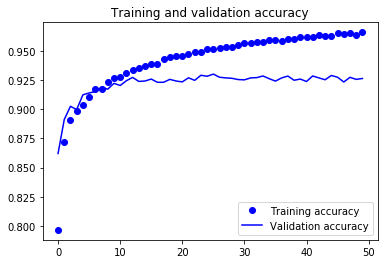

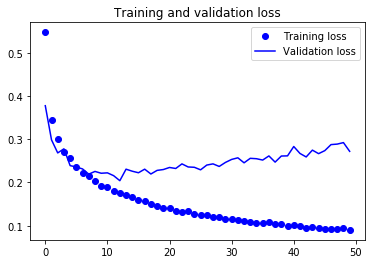

In [52]:
accuracy = cnn_train.history['acc']
val_accuracy = cnn_train.history['val_acc']
loss = cnn_train.history['loss']
val_loss = cnn_train.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Wow! Looks like adding Dropout in our model worked, even though the test accuracy did not improve significantly but the test loss decreased compared to the previous results.


Therefore, you can say that your model's generalization capability became much better since the loss on both test set and validation set was only slightly more compared to the training loss.

#### Predict Labels

Since the predictions you get are floating point values, it will not be feasible to compare the predicted labels with true test labels. So, you will round off the output which will convert the float values into an integer. Further, you will use np.argmax() to select the index number which has a higher value in a row.

In [53]:
predicted_classes = cnn_model.predict(df_test_X)

In [54]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [55]:
predicted_classes.shape, df_test_X.shape

((10000,), (10000, 28, 28, 1))

Found 9230 correct labels


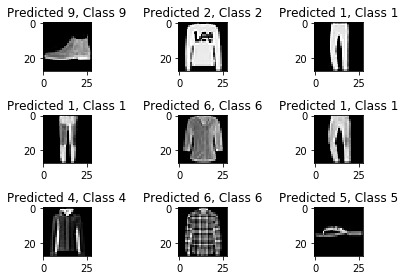

In [57]:
correct = np.where(predicted_classes==df_test_Y)[0]
print ("Found %d correct labels" % len(correct))

for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(df_test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], df_test_Y[correct]))
    plt.tight_layout()


Found 770 incorrect labels


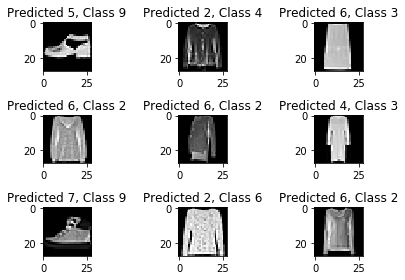

In [58]:
incorrect = np.where(predicted_classes!=df_test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))

for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(df_test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], df_test_Y[incorrect]))
    plt.tight_layout()

By looking at a few images, you cannot be sure as to why your model is not able to classify the above images correctly, but it seems like a variety of the similar patterns present on multiple classes affect the performance of the classifier although CNN is a robust architecture. For example, images 5 and 6 both belong to different classes but look kind of similar maybe a jacket or perhaps a long sleeve shirt.

### Classification Report

Classification report will help us in identifying the misclassified classes in more detail. You will be able to observe for which class the model performed bad out of given ten classes. 

In [59]:
from sklearn.metrics import classification_report

target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(df_test_Y, 
                            predicted_classes, 
                            target_names=target_names))


              precision    recall  f1-score   support

     Class 0       0.85      0.86      0.85      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.87      0.88      0.87      1000
     Class 3       0.94      0.93      0.93      1000
     Class 4       0.89      0.88      0.89      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.78      0.77      0.78      1000
     Class 7       0.95      0.98      0.97      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.98      0.96      0.97      1000

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



With this, I would close this tutorial, plesae find below the resources that I used to prepare this tutorial. All credit goes to original authors. 

Sources:
1. https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python
2. https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/02_Convolutional_Neural_Network.ipynb